## Fetch Data

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read data with headers
headers = ["Wifi1", "Wifi2", "Wifi3", "Wifi4", "Wifi5", "Wifi6", "Wifi7", "Room" ]

data = pd.read_table('wifi_localization.txt', delimiter = '\t', names=headers)
data

Wifi1  Wifi2  Wifi3  Wifi4  Wifi5  Wifi6  Wifi7  Room
0       -64    -56    -61    -66    -71    -82    -81     1
1       -68    -57    -61    -65    -71    -85    -85     1
2       -63    -60    -60    -67    -76    -85    -84     1
3       -61    -60    -68    -62    -77    -90    -80     1
4       -63    -65    -60    -63    -77    -81    -87     1
...     ...    ...    ...    ...    ...    ...    ...   ...
1995    -59    -59    -48    -66    -50    -86    -94     4
1996    -59    -56    -50    -62    -47    -87    -90     4
1997    -62    -59    -46    -65    -45    -87    -88     4
1998    -62    -58    -52    -61    -41    -90    -85     4
1999    -59    -50    -45    -60    -45    -88    -87     4

[2000 rows x 8 columns]

In [3]:
# check the unique values 
data['Room'].unique()

array([1, 2, 3, 4], dtype=int64)

## Exploratory Data Analysis and Data Visualization

In [4]:
# information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Wifi1   2000 non-null   int64
 1   Wifi2   2000 non-null   int64
 2   Wifi3   2000 non-null   int64
 3   Wifi4   2000 non-null   int64
 4   Wifi5   2000 non-null   int64
 5   Wifi6   2000 non-null   int64
 6   Wifi7   2000 non-null   int64
 7   Room    2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [5]:
# statistical information about data
data.describe()

Wifi1        Wifi2        Wifi3        Wifi4        Wifi5  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    -52.330500   -55.623500   -54.964000   -53.566500   -62.640500   
std      11.321677     3.417688     5.316186    11.471982     9.105093   
min     -74.000000   -74.000000   -73.000000   -77.000000   -89.000000   
25%     -61.000000   -58.000000   -58.000000   -63.000000   -69.000000   
50%     -55.000000   -56.000000   -55.000000   -56.000000   -64.000000   
75%     -46.000000   -53.000000   -51.000000   -46.000000   -56.000000   
max     -10.000000   -45.000000   -40.000000   -11.000000   -36.000000   

             Wifi6        Wifi7         Room  
count  2000.000000  2000.000000  2000.000000  
mean    -80.985000   -81.726500     2.500000  
std       6.516672     6.519812     1.118314  
min     -97.000000   -98.000000     1.000000  
25%     -86.000000   -87.000000     1.750000  
50%     -82.000000   -83.000000     2.500000  
75%     -77.000000   -78.000000     3.250000  
max     -61.000000   -63.000000     4.000000

In [6]:
# Number of Knowledge Level 
plt.figure()
plt.bar(data["Room"].value_counts().index, data["Room"].value_counts(), color = "red")
plt.xticks(data["Room"].values)
plt.ylabel("Frequency")
plt.title(f"Data Frequency - Room")
plt.show()
print(f"Number of Room \n{data['Room'].value_counts()}")

Number of Room 
1    500
2    500
3    500
4    500
Name: Room, dtype: int64


In [7]:
# see pairplot for relation between the wifi
sns.pairplot(data, hue="Room", palette='Dark2')
plt.show()

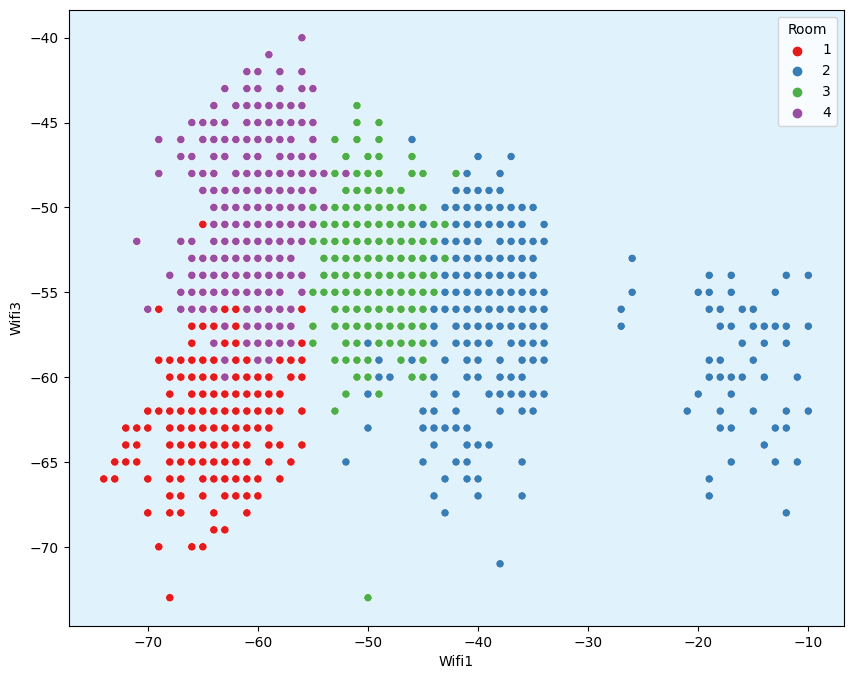

In [8]:
f,ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data['Wifi1'], data['Wifi3'], hue=data['Room'], ax=ax, palette="Set1")
ax.set_facecolor('#e0f2fc')
plt.show()

In [9]:
# clearly see the rooms
f,ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data['Wifi5'], data['Wifi1'], hue=data['Room'], ax=ax, palette="Set1")
ax.set_facecolor('#e0f2fc')
plt.show()

In [10]:
# clearly see the rooms
f,ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data['Wifi6'], data['Wifi4'], hue=data['Room'], ax=ax, palette="Set1")
ax.set_facecolor('#e0f2fc')
plt.show()

In [11]:
# function for plot histogram
def plotHistogram(column):
    """
        input: Column name
        output: Histogram plot
    """
    
    plt.figure()
    plt.hist(data[column], bins = 30, color = "orange")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Data Frequency - {column}")
    plt.show()

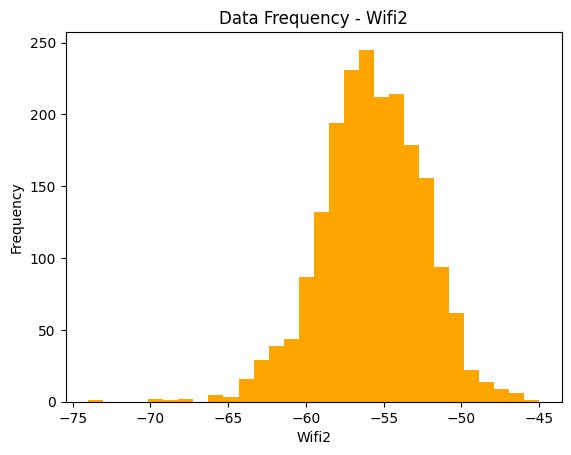

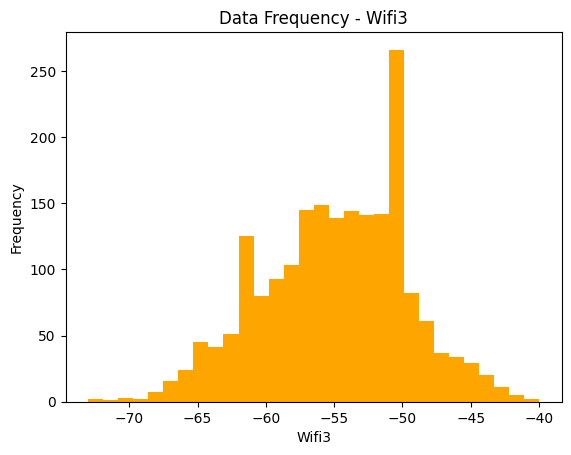

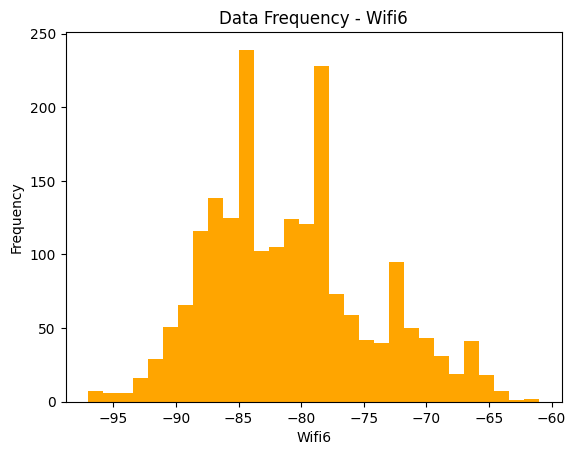

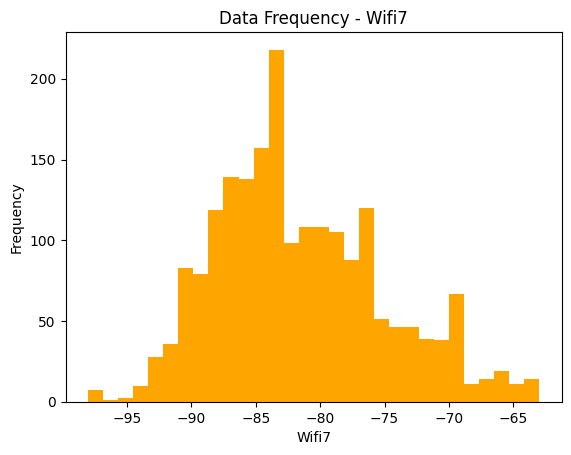

In [12]:
# plot histogram for numerical variables 
numerical_variables = ["Wifi1", "Wifi2" ,"Wifi3","Wifi4", "Wifi5", "Wifi6", "Wifi7"]
for i in numerical_variables:
    plotHistogram(i)

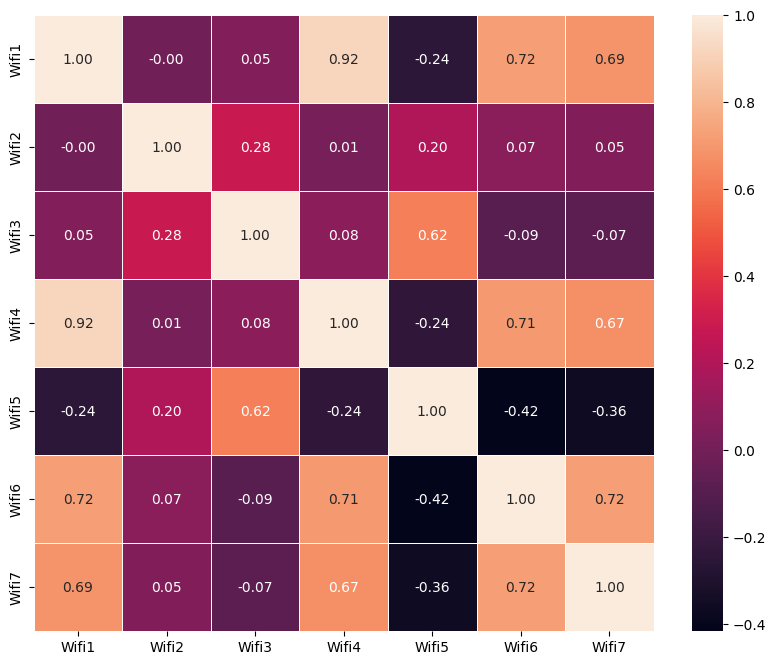

In [13]:
# correlation between numerical variables
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data.loc[:,["Wifi1", "Wifi2" ,"Wifi3","Wifi4", "Wifi5", "Wifi6", "Wifi7"]].corr(),
            annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

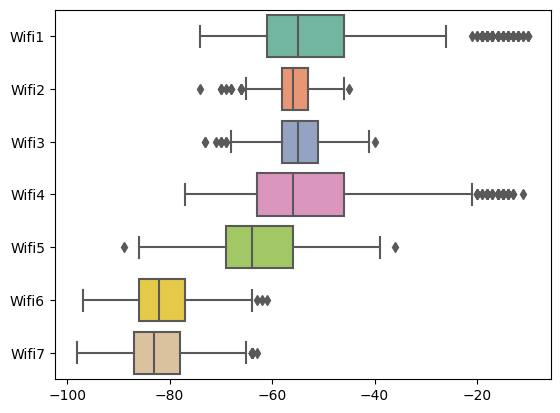

In [14]:
sns.boxplot(data=data.loc[:,["Wifi1", "Wifi2" ,"Wifi3","Wifi4", "Wifi5", "Wifi6", "Wifi7"]], orient="h", palette="Set2")
plt.show()

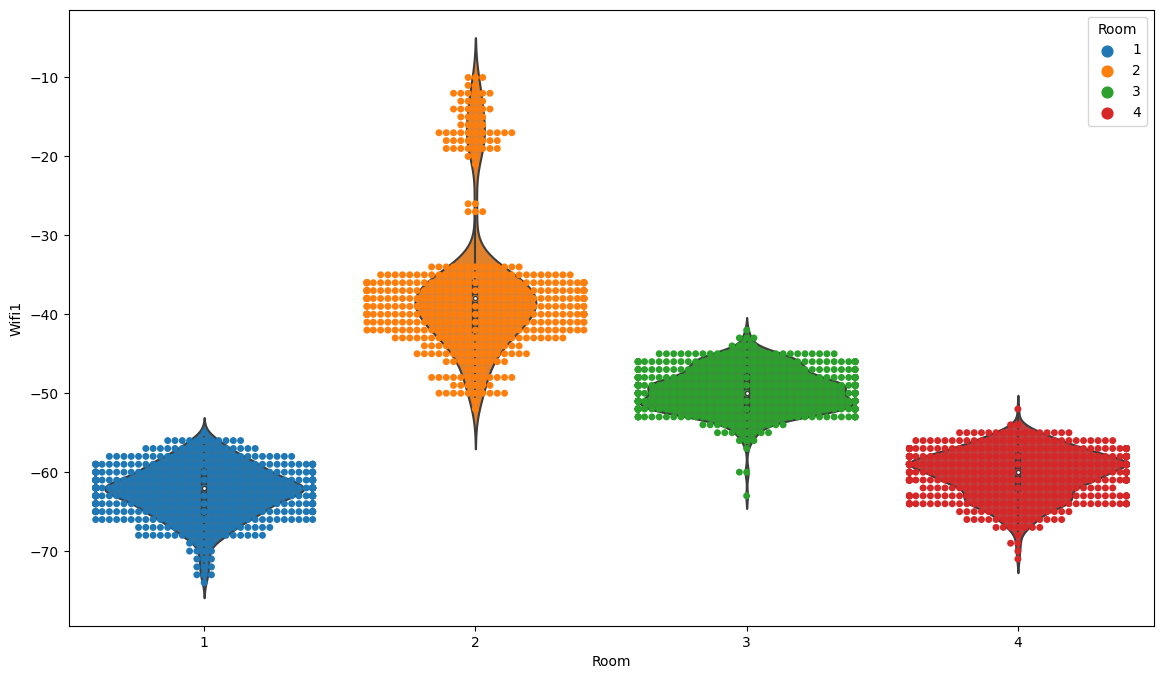

In [15]:
plt.figure(figsize = (14,8))
sns.swarmplot(x = 'Room', y = 'Wifi1', data = data, hue = 'Room')
sns.violinplot(x = 'Room', y = 'Wifi1', data = data)
plt.show()

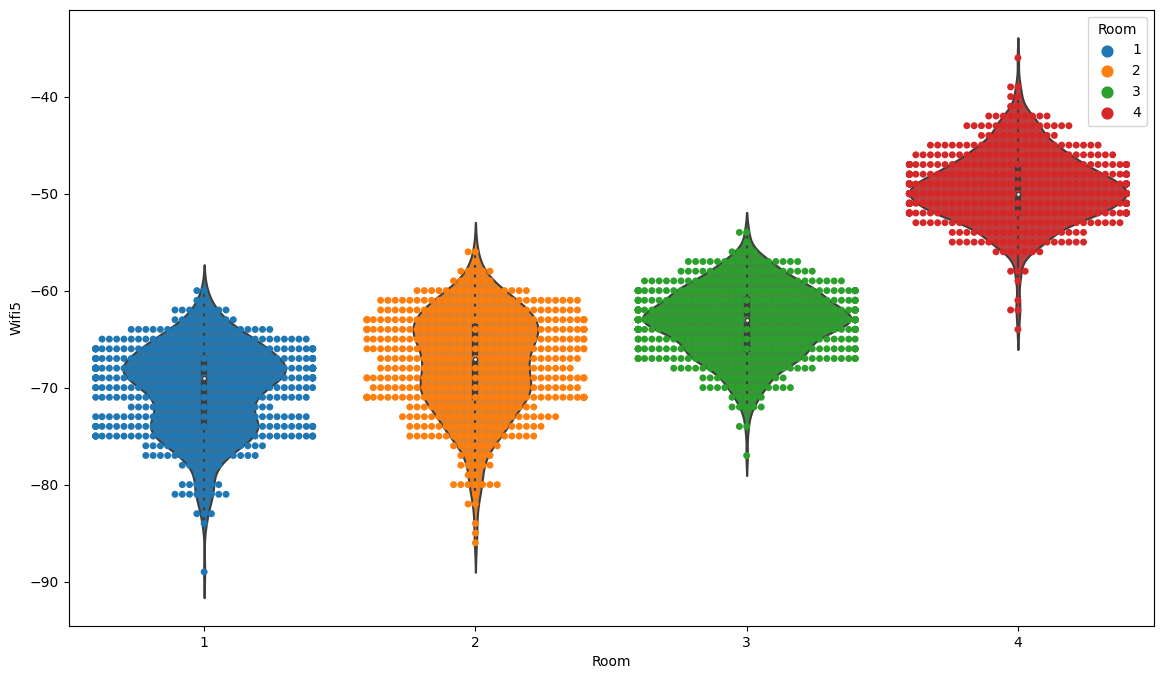

In [16]:
plt.figure(figsize = (14,8))
sns.swarmplot(x = 'Room', y = 'Wifi5', data = data, hue = 'Room')
sns.violinplot(x = 'Room', y = 'Wifi5', data = data)
plt.show()

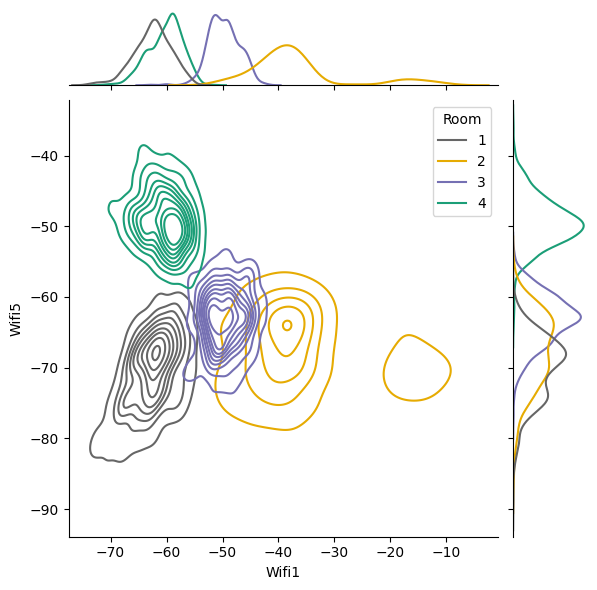

In [17]:
sns.jointplot(
    data=data,
    x="Wifi1", y="Wifi5", hue="Room",
    kind="kde", palette="Dark2_r")
plt.show()

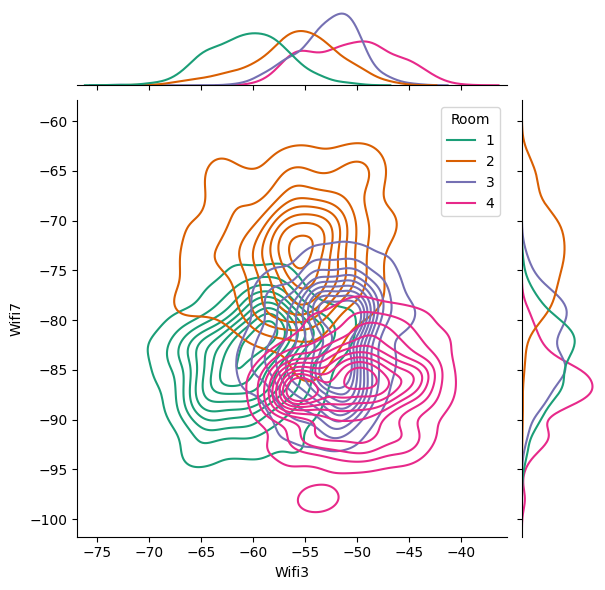

In [18]:
sns.jointplot(
    data=data,
    x="Wifi3", y="Wifi7", hue="Room",
    kind="kde", palette="Dark2")
plt.show()

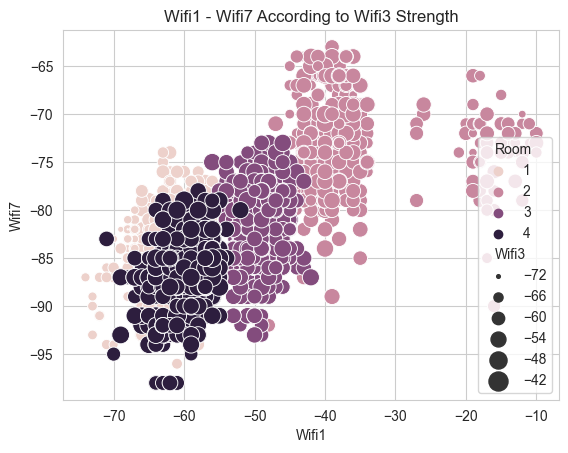

In [19]:
sns.set_style("whitegrid")
sns.scatterplot(x="Wifi1", y="Wifi7", hue="Room",
                size="Wifi3", sizes=(1,200), data=data)
plt.xlabel("Wifi1")
plt.ylabel("Wifi7")
plt.title("Wifi1 - Wifi7 According to Wifi3 Strength")
plt.show()

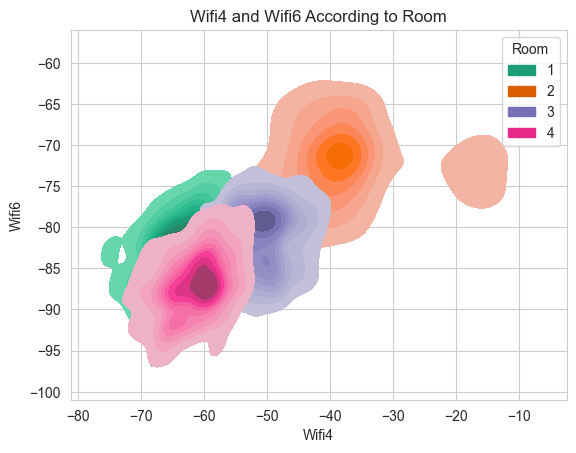

In [20]:
sns.kdeplot(data=data, x="Wifi4", y="Wifi6", hue="Room", fill = True, palette="Dark2")
plt.xlabel("Wifi4")
plt.ylabel("Wifi6")
plt.title("Wifi4 and Wifi6 According to Room")
plt.show()

## Preprocessing

In [21]:
from sklearn.preprocessing import LabelEncoder
# define a function for label encoding
def labelEncoder(labelColumn):
    labelValues = labelColumn
    unique_labels = labelColumn.unique()
    le = LabelEncoder()
    labelColumn = le.fit_transform(labelColumn)
    print('Encoding Approach:')
    for i, j in zip(unique_labels, labelColumn[np.sort(np.unique(labelColumn, return_index=True)[1])]): 
        print(f'{i}  ==>  {j}')
    return labelColumn

In [22]:
# there is a error for XGBoost --> Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]
# for prevent that error i use labelencoder
data["Room"] = labelEncoder(data["Room"])

Encoding Approach:
1  ==>  0
2  ==>  1
3  ==>  2
4  ==>  3


In [23]:
# create input and output
X = data.drop('Room', axis = 1)
y = data['Room']

In [24]:
# standardization and train test split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

standardScale = StandardScaler()
standardScale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=128)

# see train and test dataset shape
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (1600, 7)
y_train: (1600,)
X_test: (400, 7)
y_test: (400,)


In [25]:
# import classifiers
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# defining the function that multiple machine learning classifier include
def all_classifiers(X_train, X_test, y_train, y_test):
    """
    This function use multple machine learning classifier and show us the results of them 
    :param X_train: train input
    :param X_test: test input
    :param y_train: train output
    :param y_test: test output
    :return: accuracy score, classification report, confusion matrix for each classifier
    """
    
    # standardization of train and test data
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # for Support Vector Machine Classifier
    print("*************************************************************************")
    svm_model = SVC()
    svm_model.fit(X_train, y_train)
    svm_train_predictions = svm_model.predict(X_train)
    svm_test_predictions = svm_model.predict(X_test)
    print('Train Accuracy Score for Support Vector Machine Model:', accuracy_score(svm_train_predictions, y_train))
    print("Test Accuracy Score for Support Vector Machine Model:", accuracy_score(svm_test_predictions, y_test))
    print(confusion_matrix(y_test, svm_test_predictions))
    print(classification_report(y_test, svm_test_predictions))
    
    
    # for Decision Tree Classifier
    print("*************************************************************************")
    decisiont_model = DecisionTreeClassifier()
    decisiont_model.fit(X_train, y_train)
    dt_train_predictions = decisiont_model.predict(X_train)
    dt_test_predictions = decisiont_model.predict(X_test)
    print('Train Accuracy Score for Decision Tree Model:', accuracy_score(dt_train_predictions, y_train))
    print("Test Accuracy Score for Decision Tree Model:", accuracy_score(dt_test_predictions, y_test))
    print(confusion_matrix(y_test, dt_test_predictions))
    print(classification_report(y_test, dt_test_predictions))
    
    
    # for GaussianNB Classifier
    print("*************************************************************************")
    gnb_model = GaussianNB()
    gnb_model.fit(X_train, y_train)
    gnb_train_predictions = gnb_model.predict(X_train)
    gnb_test_predictions = gnb_model.predict(X_test)
    print('Train Accuracy Score for GaussianNB Classifier:', accuracy_score(gnb_train_predictions, y_train))
    print("Test Accuracy Score for GaussianNB Classifier:", accuracy_score(gnb_test_predictions, y_test))
    print(confusion_matrix(y_test, gnb_test_predictions))
    print(classification_report(y_test, gnb_test_predictions))
    
    
    # for Bagging Classifier
    print("*************************************************************************")
    bag_model = BaggingClassifier()
    bag_model.fit(X_train, y_train)
    bag_train_predictions = bag_model.predict(X_train)
    bag_test_predictions = bag_model.predict(X_test)
    print('Train Accuracy Score for Bagging Classifier:', accuracy_score(bag_train_predictions, y_train))
    print("Test Accuracy Score for Bagging Classifier:", accuracy_score(bag_test_predictions, y_test))
    print(confusion_matrix(y_test, bag_test_predictions))
    print(classification_report(y_test, bag_test_predictions))

    
    # for Random Forest Classifier
    print("*************************************************************************")
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)
    rf_train_predictions = rf_model.predict(X_train)
    rf_test_predictions = rf_model.predict(X_test)
    print('Train Accuracy Score for Random Forest Classifier:', accuracy_score(rf_train_predictions, y_train))
    print("Test Accuracy Score for Random Forest classifier:", accuracy_score(rf_test_predictions, y_test))
    print(confusion_matrix(y_test, rf_test_predictions))
    print(classification_report(y_test, rf_test_predictions))
    
    
    # for Ada Boost Classifier
    print("*************************************************************************")
    ada_model = AdaBoostClassifier()
    ada_model.fit(X_train, y_train)
    ada_train_predictions = ada_model.predict(X_train)
    ada_test_predictions = ada_model.predict(X_test)
    print('Train Accuracy Score for Ada Boost Classifier:', accuracy_score(ada_train_predictions, y_train))
    print("Test Accuracy Score Ada Boost Classifier:", accuracy_score(ada_test_predictions, y_test))
    print(confusion_matrix(y_test, ada_test_predictions))
    print(classification_report(y_test, ada_test_predictions))
    
    
    # for K-Neighbors Classifier
    print("*************************************************************************")
    kn_model = KNeighborsClassifier()
    kn_model.fit(X_train, y_train)
    kn_train_predictions = kn_model.predict(X_train)
    kn_test_predictions = kn_model.predict(X_test)
    print('Train Accuracy Score for K-Neighbors classifier:', accuracy_score(kn_train_predictions, y_train))
    print("Test Accuracy Score for K-Neighbors Classifier:", accuracy_score(kn_test_predictions, y_test))
    print(confusion_matrix(y_test, kn_test_predictions))
    print(classification_report(y_test, kn_test_predictions))
    
    
    # for Logistic Regression Classifier
    print("*************************************************************************")
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)
    lr_train_predictions = lr_model.predict(X_train)
    lr_test_predictions = lr_model.predict(X_test)
    print('Train Accuracy Score for Logistic Regression Classifier:', accuracy_score(lr_train_predictions, y_train))
    print("Test Accuracy Score for Logistic Regression Classifier:", accuracy_score(lr_test_predictions, y_test))
    print(confusion_matrix(y_test, lr_test_predictions))
    print(classification_report(y_test, lr_test_predictions))
    
    
    # for XGBoost Classifier
    print("*************************************************************************")
    xgb_model = XGBClassifier()
    xgb_model.fit(X_train, y_train)
    xgb_train_predictions = xgb_model.predict(X_train)
    xgb_test_predictions = xgb_model.predict(X_test)
    print('Train Accuracy Score for XGBoost Classifier:', accuracy_score(xgb_train_predictions, y_train))
    print("Test Accuracy Score for XGBoost Classifier:", accuracy_score(xgb_test_predictions, y_test))
    print(confusion_matrix(y_test, xgb_test_predictions))
    print(classification_report(y_test, xgb_test_predictions))
    print("*************************************************************************")
    
    print("----------------Summary----------------")
    print("SVM Test Accuracy:", accuracy_score(svm_test_predictions, y_test))
    print("Decision Tree Test Accuracy:", accuracy_score(dt_test_predictions, y_test))
    print("GaussianNB Test Accuracy:", accuracy_score(gnb_test_predictions, y_test))
    print("Bagging Test Accuracy:", accuracy_score(bag_test_predictions, y_test))
    print("Random Forest Test Accuracy:", accuracy_score(rf_test_predictions, y_test))
    print("Ada Boost Test Accuracy:", accuracy_score(ada_test_predictions, y_test))
    print("K-Neighbors Test Accuracy:", accuracy_score(kn_test_predictions, y_test))
    print("Logistic Regression Test Accuracy:", accuracy_score(lr_test_predictions, y_test))
    print("XGBoost Test Accuracy:", accuracy_score(xgb_test_predictions, y_test))

In [26]:
all_classifiers(X_train, X_test, y_train, y_test)

*************************************************************************
Train Accuracy Score for Support Vector Machine Model: 0.98375
Test Accuracy Score for Support Vector Machine Model: 0.9775
[[ 92   0   0   1]
 [  0 104   6   0]
 [  1   1  92   0]
 [  0   0   0 103]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        93
           1       0.99      0.95      0.97       110
           2       0.94      0.98      0.96        94
           3       0.99      1.00      1.00       103

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

*************************************************************************
Train Accuracy Score for Decision Tree Model: 1.0
Test Accuracy Score for Decision Tree Model: 0.97
[[ 93   0   0   0]
 [  0 106   4   0]
 [  3   4  87   0]
 [  0   0   1 102]]
              precision    recall  f1-s

## Model Selection and Parameter Tuning

In [27]:
# Choose the best 2 models
# XGBoost Test Accuracy: 0.99 and Random Forest Test Accuracy: 0.9875
XGB_model = XGBClassifier()
XGB_model.fit(X_train, y_train)
XGB_train_predictions = XGB_model.predict(X_train)
XGB_test_predictions = XGB_model.predict(X_test)
print('Train Accuracy Score for XGBoost Classifier:', accuracy_score(XGB_train_predictions, y_train))
print("Test Accuracy Score for XGBoost Classifier:", accuracy_score(XGB_test_predictions, y_test))
print(confusion_matrix(y_test, XGB_test_predictions))
print(classification_report(y_test, XGB_test_predictions))


rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_train_predictions = rf_model.predict(X_train)
rf_test_predictions = rf_model.predict(X_test)
print('Train Accuracy Score for Random Forest Classifier:', accuracy_score(rf_train_predictions, y_train))
print("Test Accuracy Score for Random Forest classifier:", accuracy_score(rf_test_predictions, y_test))
print(confusion_matrix(y_test, rf_test_predictions))
print(classification_report(y_test, rf_test_predictions))

Train Accuracy Score for XGBoost Classifier: 1.0
Test Accuracy Score for XGBoost Classifier: 0.99
[[ 93   0   0   0]
 [  0 108   2   0]
 [  0   1  93   0]
 [  0   0   1 102]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       0.99      0.98      0.99       110
           2       0.97      0.99      0.98        94
           3       1.00      0.99      1.00       103

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400

Train Accuracy Score for Random Forest Classifier: 1.0
Test Accuracy Score for Random Forest classifier: 0.9925
[[ 93   0   0   0]
 [  0 107   3   0]
 [  0   0  94   0]
 [  0   0   0 103]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      0.97      0.99       110
           2       0.97      1.00     

In [28]:
# GridSearchCV for Random Forest
from sklearn.model_selection import GridSearchCV
rf_parameters = {'n_estimators': [i for i in range(100, 600, 100)],
                 'max_features': ['auto', 'sqrt', 'log2'],
                 'max_depth' : [x for x in range(1, 8, 2)],
                 'criterion' : ['gini', 'entropy']}
gsc_rf = GridSearchCV(rf_model, rf_parameters, cv=5, verbose=1, n_jobs=1)
grid_results_rf = gsc_rf.fit(X_train, y_train)
grid_results_rf.best_params_

Fitting 5 folds for each of 120 candidates, totalling 600 fits


{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 400}

In [29]:
# Summarize the results in a readable format
print(f"Best 8 test score: {(grid_results_rf.cv_results_['mean_test_score'][::-1])[:8]}")
results_df = pd.DataFrame(grid_results_rf.cv_results_)

cleaned_results_df = results_df[["mean_fit_time", "mean_test_score", "std_test_score", "rank_test_score"]]
cleaned_results_df.sort_values("rank_test_score",).head(3)

Best 8 test score: [0.981875 0.98125  0.980625 0.979375 0.980625 0.980625 0.9825   0.98125 ]


mean_fit_time  mean_test_score  std_test_score  rank_test_score
113       1.421751         0.982500        0.007289                1
108       1.716871         0.982500        0.007289                1
119       1.617129         0.981875        0.008004                3

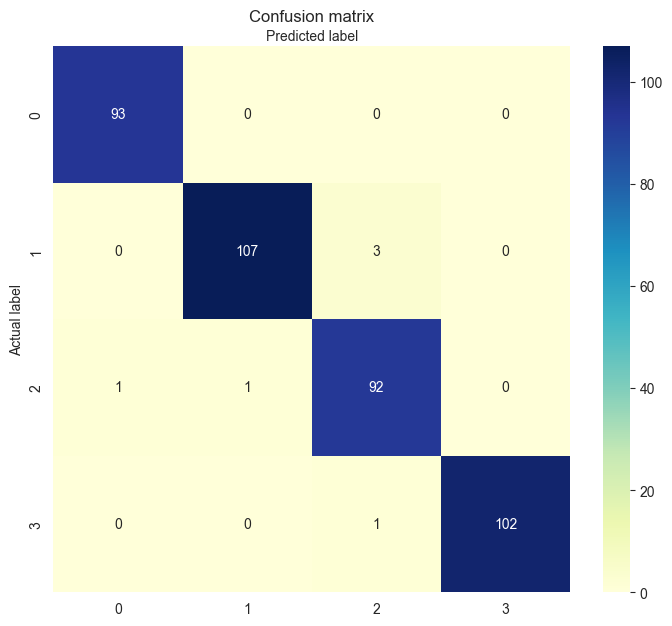

After Tuning Test Accuracy Score for Random Forest Classifier: 0.985


In [30]:
# Extract the best model
best_clf = grid_results_rf.best_estimator_
y_pred = best_clf.predict(X_test)

# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Create heatmap from the confusion matrix
%matplotlib inline
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print("After Tuning Test Accuracy Score for Random Forest Classifier:", accuracy_score(y_pred, y_test))

In [31]:
# GridSearchCV for XGBoost
XGB_params = { 'max_depth': [3,6,10],
              'learning_rate': [0.01, 0.05, 0.1],
              'n_estimators': [100, 500, 1000],
              'colsample_bytree': [0.3, 0.7]}
gsc_XGB = GridSearchCV(XGB_model, XGB_params, cv=5, verbose=1, n_jobs=1)
grid_results_XGB = gsc_XGB.fit(X_train, y_train)
grid_results_XGB.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 100}

In [32]:
# Summarize the results in a readable format
print(f"Best 8 test score: {(grid_results_XGB.cv_results_['mean_test_score'][::-1])[:8]}")
results_XGB = pd.DataFrame(grid_results_XGB.cv_results_)

cleaned_results_XGB = results_XGB[["mean_fit_time", "mean_test_score", "std_test_score", "rank_test_score"]]
cleaned_results_XGB.sort_values("rank_test_score").head(3)

Best 8 test score: [0.981875 0.981875 0.985    0.98125  0.981875 0.983125 0.980625 0.98125 ]


mean_fit_time  mean_test_score  std_test_score  rank_test_score
51       0.367104         0.985000        0.008927                1
31       2.367219         0.984375        0.009270                2
42       0.424436         0.984375        0.009270                2

In [33]:
# Extract the best model
best_clf = grid_results_XGB.best_estimator_
y_pred = best_clf.predict(X_test)

# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Create heatmap from the confusion matrix
%matplotlib inline
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print("After Tuning Test Accuracy Score for XGBoost Classifier:", accuracy_score(y_pred, y_test))

After Tuning Test Accuracy Score for XGBoost Classifier: 0.985


## Clustering Model

### Agglomerative Clustering

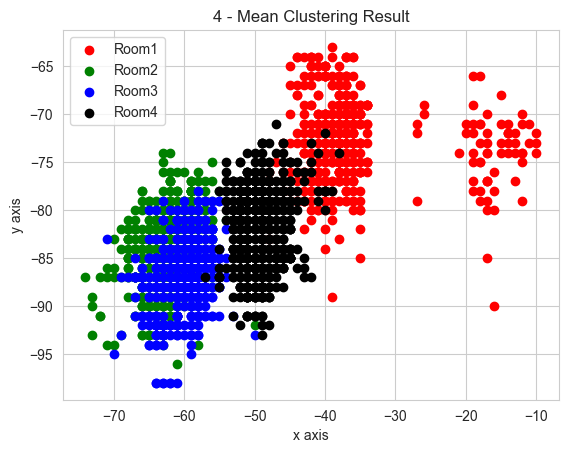

In [34]:
from sklearn.cluster import AgglomerativeClustering

AggC= AgglomerativeClustering(n_clusters=4, affinity= "euclidean", linkage = "ward")
cluster = AggC.fit_predict(data)

data["Room"] = cluster

plt.figure()
plt.scatter(data.Wifi1[data.Room == 0 ], data.Wifi7[data.Room == 0],color = "red", label="Room1")
plt.scatter(data.Wifi1[data.Room == 1 ], data.Wifi7[data.Room == 1],color = "green", label="Room2")
plt.scatter(data.Wifi1[data.Room == 2 ], data.Wifi7[data.Room == 2],color = "blue", label="Room3")
plt.scatter(data.Wifi1[data.Room == 3 ], data.Wifi7[data.Room == 3],color = "black", label="Room4")
plt.legend()
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("4 - Mean Clustering Result")
plt.show()

### KMeans Clustering

In [35]:
from sklearn.cluster import KMeans
wcss = []

for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1,15), wcss)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("wcss")
plt.show()

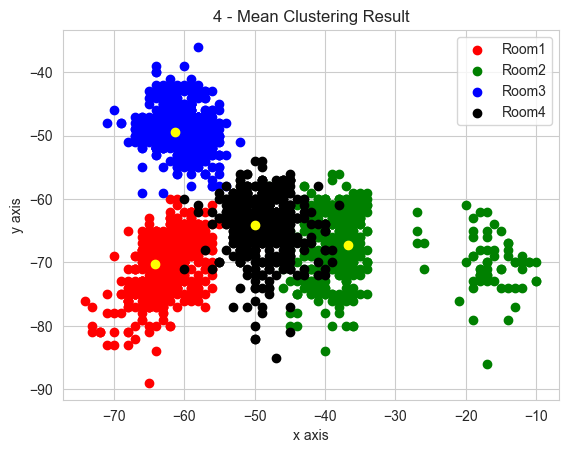

In [36]:
k_mean = KMeans(n_clusters=4)
clusters = k_mean.fit_predict(data)

data["Room"] = clusters

plt.figure()
plt.scatter(data.Wifi1[data.Room == 0 ], data.Wifi5[data.Room == 0],color = "red", label="Room1")
plt.scatter(data.Wifi1[data.Room == 1 ], data.Wifi5[data.Room == 1],color = "green", label="Room2")
plt.scatter(data.Wifi1[data.Room == 2 ], data.Wifi5[data.Room == 2],color = "blue", label="Room3")
plt.scatter(data.Wifi1[data.Room == 3 ], data.Wifi5[data.Room == 3],color = "black", label="Room4")
plt.scatter(k_mean.cluster_centers_[:,3], k_mean.cluster_centers_[:,4], color = "yellow")
plt.legend()
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("4 - Mean Clustering Result")
plt.show()